In [6]:
import random
import csv
import math
import operator

In [70]:
#loading the data and splitting it into test and training set RANDOMLY

def define_sets(filename, split_percent, trainingSet=[] , testSet=[]):
    '''loads the data and splits into test and training randomly'''
    with open(filename, 'rt') as csvfile: #opening the file
        lines = csv.reader(csvfile) #creates object
        dataSet = list(lines) #dataset is a 2D array whose each element is an array of four attributes and one name

        del dataSet[-1]

        #four attributes are in str form. we convert it into float
        for x in range(0,len(dataSet)-1): #last entry in dataset is blank
            for y in range(0,4):
                dataSet[x][y] = float(dataSet[x][y]) #typecasting the attributes

        
        #splitting into training and test sets        
        dataSetcopy = dataSet
        random.shuffle(dataSetcopy)
        length_train = int(split_percent * (len(dataSet)-1) / 100)

        for a in range(0,len(dataSetcopy)-1):
            if (a<length_train):
                trainingSet.append(dataSetcopy[a])
            else:
                testSet.append(dataSetcopy[a])
                
        

                

In [71]:
#Finding Euclid distance between a given sample and all entries in the training set

#Finding the 'k' nearest entries in the training set i.e, K-Nearest Neighbors!

def finding_neighbours(trainingSet, testInstance, k):
    distances_list = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = 0
        for y in range(length):
            dist = dist + pow((float(testInstance[y]) - float(trainingSet[x][y])),2)
        dist = math.sqrt(dist)
        distances_list.append((trainingSet[x], dist))
        
    distances_list.sort(key=operator.itemgetter(1))

    k_neighbours = []
    for x in range(k):
        k_neighbours.append(distances_list[x][0])
    return k_neighbours




In [72]:
#predicting type of flower of sample

def predict_flower(k_neighbours):
    flower_names = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
    frequency = [0,0,0]
    
    for x in range(0,len(k_neighbours)):
        if k_neighbours[x][4] == flower_names[0]:
            frequency[0] +=1
        elif k_neighbours[x][4] == flower_names[1]:
            frequency[1] +=1
        elif k_neighbours[x][4] == flower_names[2]:
            frequency[2] +=1

    index = frequency.index(max(frequency))
    prediction = flower_names[index]
    
    return prediction

In [73]:
#accuracy

def finding_accuracy(list_predictions,testSet):
    count = 0 
    for x in range(len(testSet)):
        if list_predictions[x] == testSet[x][-1]:
            count += 1
    
    accuracy = count/(len(testSet))
    accuracy_percent = accuracy * 100
    return accuracy_percent

In [74]:
#main

trainingSet=[]
testSet=[]
split = 66 #percentage of maindata to be used in the training set
    
    
define_sets('iris.data', split, trainingSet, testSet)
print ('Train set: ' + repr(len(trainingSet)))
print ('Test set: ' + repr(len(testSet)))

list_predictions = []
alpha = len(testSet)

k = 4

for x in range(alpha):
    k_neighbours = finding_neighbours(trainingSet,testSet[x],k)
    prediction = predict_flower(k_neighbours)
    list_predictions.append(prediction)
    print()
    print(str(x+1) + ". Prediction ----> " + str(prediction) + "         Real ----> " + str(testSet[x][-1]) )
    
Accuracy = finding_accuracy(list_predictions,testSet)
print()
print("The accuracy is " + str(Accuracy) + "%")


Train set: 98
Test set: 51

1. Prediction ----> Iris-virginica         Real ----> Iris-virginica

2. Prediction ----> Iris-versicolor         Real ----> Iris-versicolor

3. Prediction ----> Iris-versicolor         Real ----> Iris-versicolor

4. Prediction ----> Iris-virginica         Real ----> Iris-virginica

5. Prediction ----> Iris-virginica         Real ----> Iris-virginica

6. Prediction ----> Iris-versicolor         Real ----> Iris-versicolor

7. Prediction ----> Iris-setosa         Real ----> Iris-setosa

8. Prediction ----> Iris-virginica         Real ----> Iris-virginica

9. Prediction ----> Iris-versicolor         Real ----> Iris-versicolor

10. Prediction ----> Iris-setosa         Real ----> Iris-setosa

11. Prediction ----> Iris-setosa         Real ----> Iris-setosa

12. Prediction ----> Iris-setosa         Real ----> Iris-setosa

13. Prediction ----> Iris-versicolor         Real ----> Iris-versicolor

14. Prediction ----> Iris-virginica         Real ----> Iris-virginica

1

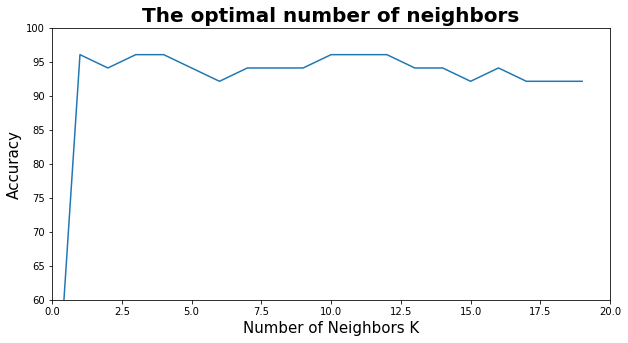

Highest accuracy achieved = 96.07843137254902
At k = 1


In [80]:
import matplotlib.pyplot as plt

k_list = [] #array of k values
accuracy_list = [] #array of accuracy(s) corresponding to respective k
list_predictions = []
alpha = len(testSet)

for k in range(0,20):
    k_list.append(k)
    
    for x in range(alpha):
        k_neighbours = finding_neighbours(trainingSet,testSet[x],k)
        prediction = predict_flower(k_neighbours)
        list_predictions.append(prediction)
        
    Accuracy = finding_accuracy(list_predictions,testSet)
    accuracy_list.append(Accuracy)
    
    del list_predictions[:]

#plotting graph k vs. accuracy
plt.figure()
plt.figure(figsize=(10,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(k_list,accuracy_list)
plt.axis([0,20,60,100])
plt.show()

print("Highest accuracy achieved = " + str(max(accuracy_list)))
index = accuracy_list.index(max(accuracy_list))

print("At k = " + str(k_list[index]))